In [164]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adani-stocks/adani.csv


# ****Loading Data

In [165]:
df=pd.read_csv('/kaggle/input/adani-stocks/adani.csv')
df.head()

,timestamp,symbol,company,open,high,low,close,volume,dividends,stock_splits
0,1025461800000000000,ACC,ACC Limited,107.789,109.810,107.115,108.968,659631,0.0,0.0
1,1025461800000000000,AMBUJACEM,Ambuja Cements Limited,17.278,17.660,17.202,17.573,630442,0.0,0.0
2,1025461800000000000,ADANIENT,Adani Enterprises Limited,-0.010,-0.011,-0.010,-0.010,1080397,0.0,0.0
3,1025548200000000000,ACC,ACC Limited,108.496,110.046,107.789,108.059,282660,0.0,0.0
4,1025548200000000000,AMBUJACEM,Ambuja Cements Limited,17.573,17.748,17.409,17.560,1007265,0.0,0.0


In [166]:
df.columns

Index(['timestamp', 'symbol', 'company', 'open', 'high', 'low', 'close',
       'volume', 'dividends', 'stock_splits'],
      dtype='object')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31497 entries, 0 to 31496
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     31497 non-null  int64  
 1   symbol        31497 non-null  object 
 2   company       31497 non-null  object 
 3   open          31497 non-null  float64
 4   high          31497 non-null  float64
 5   low           31497 non-null  float64
 6   close         31497 non-null  float64
 7   volume        31497 non-null  int64  
 8   dividends     31497 non-null  float64
 9   stock_splits  31497 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 2.4+ MB


In [168]:
df.describe()

,timestamp,open,high,low,close,volume,dividends,stock_splits
count,3.149700e+04,31497.000000,31497.000000,31497.000000,31497.000000,3.149700e+04,31497.000000,31497.000000
mean,1.409762e+18,404.542261,411.745505,396.689603,404.171407,3.594056e+06,0.017824,0.000381
std,1.817938e+17,623.108375,633.783423,610.711441,622.359535,7.932287e+06,0.530637,0.041405
min,1.025462e+18,-0.011000,-0.011000,-0.011000,-0.011000,0.000000e+00,0.000000,0.000000
25%,1.267036e+18,59.423000,60.773000,58.000000,59.238000,3.934800e+05,0.000000,0.000000
50%,1.434911e+18,140.100000,143.201000,137.100000,139.993000,1.347016e+06,0.000000,0.000000
75%,1.569868e+18,384.277000,392.376000,377.043000,384.034000,3.874840e+06,0.000000,0.000000
max,1.677091e+18,4175.000000,4236.750000,4066.400000,4165.300000,2.421999e+08,58.000000,5.000000


# ****Correlation Of Features

In [169]:
corel=df.corr()
corel

,timestamp,open,high,low,close,volume,dividends,stock_splits
timestamp,1.000000,0.412538,0.413003,0.412130,0.412635,0.106787,0.002336,-0.010016
open,0.412538,1.000000,0.999765,0.999595,0.999481,-0.128513,0.030968,-0.004614
high,0.413003,0.999765,1.000000,0.999459,0.999697,-0.126813,0.030806,-0.004611
low,0.412130,0.999595,0.999459,1.000000,0.999751,-0.130491,0.031399,-0.004635
close,0.412635,0.999481,0.999697,0.999751,1.000000,-0.128443,0.031101,-0.004638
volume,0.106787,-0.128513,-0.126813,-0.130491,-0.128443,1.000000,-0.007810,-0.002274
dividends,0.002336,0.030968,0.030806,0.031399,0.031101,-0.007810,1.000000,-0.000309
stock_splits,-0.010016,-0.004614,-0.004611,-0.004635,-0.004638,-0.002274,-0.000309,1.000000


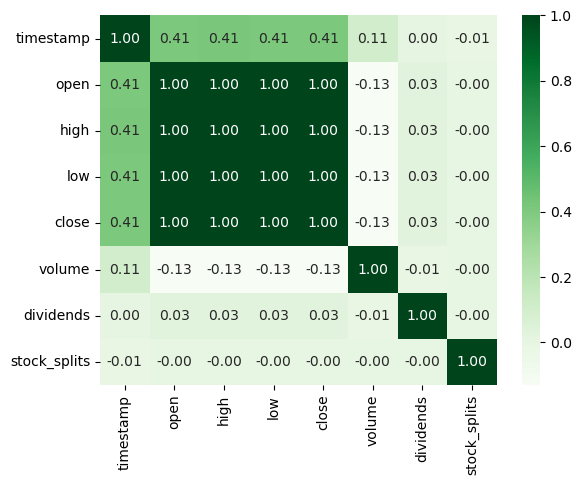

In [170]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

# ****Exploratory Data Analysis

# Distribution of Plots

<Figure size 1200x600 with 0 Axes>

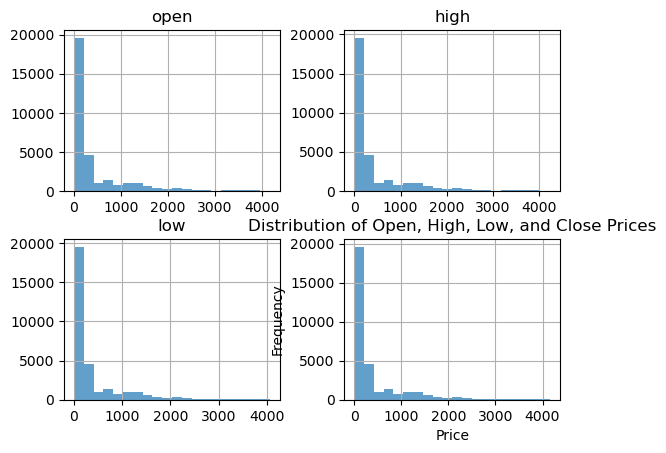

In [171]:
plt.figure(figsize=(12, 6))
df[['open', 'high', 'low', 'close']].hist(bins=20, alpha=0.7)
plt.title('Distribution of Open, High, Low, and Close Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Time Series Analysis

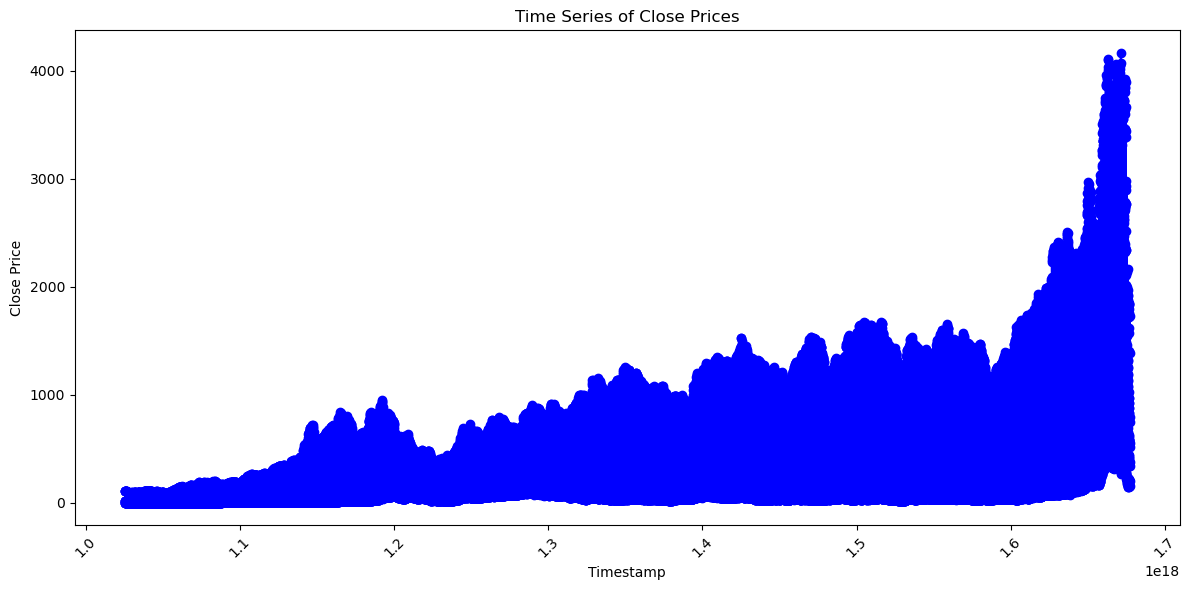

In [172]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], marker='o', linestyle='-', color='b')
plt.title('Time Series of Close Prices')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Volume Analysis

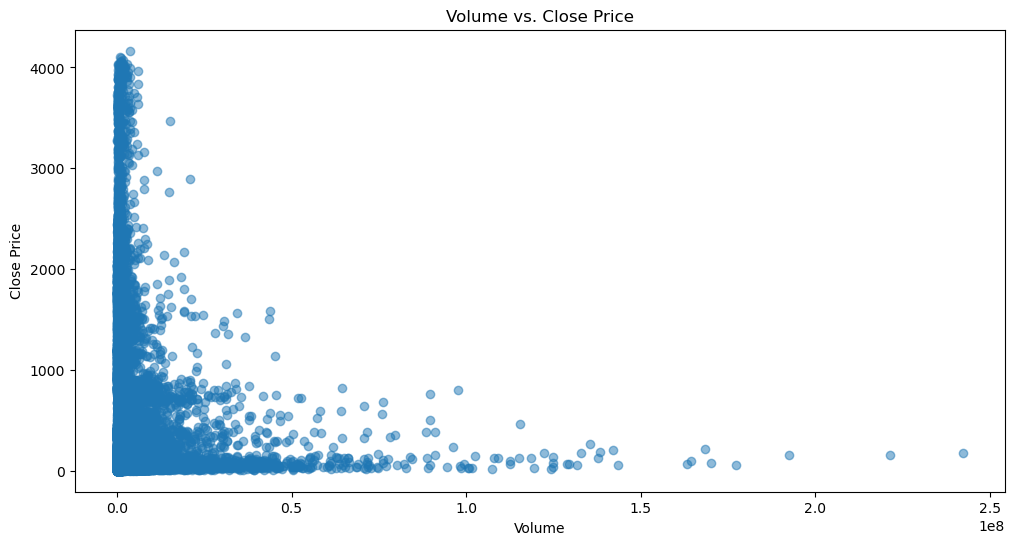

In [173]:
plt.figure(figsize=(12, 6))
plt.scatter(df['volume'], df['close'], alpha=0.5)
plt.title('Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()


# Close vs Volume

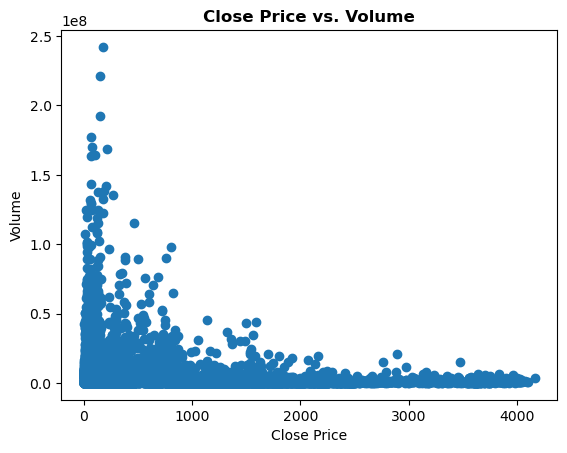

In [174]:
plt.scatter(df['close'], df['volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()


# Dividends and Stock Splits

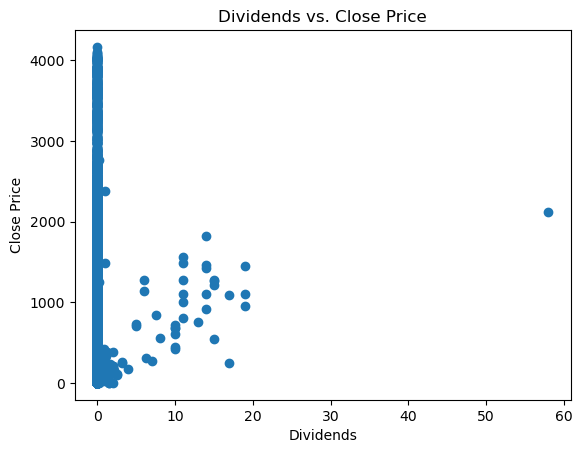

In [175]:
# Dividends vs. Close Price
plt.scatter(df['dividends'], df['close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()



# Moving Averages

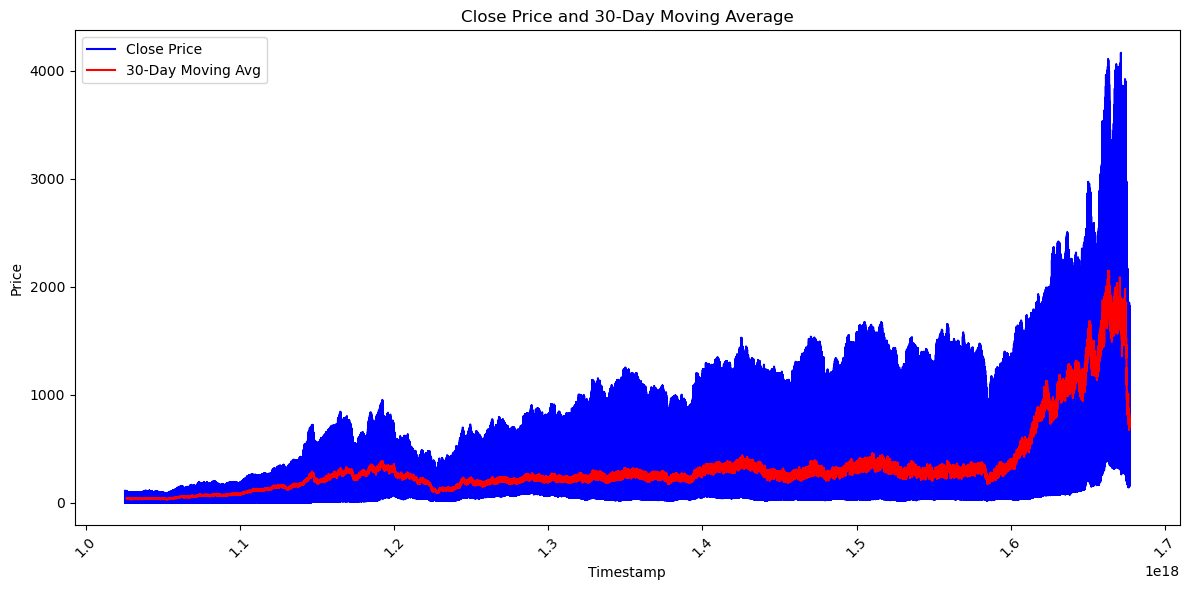

In [176]:
window = 30  # Adjust the window size
df['moving_avg'] = df['close'].rolling(window=window).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Close Price', color='b')
plt.plot(df['timestamp'], df['moving_avg'], label=f'{window}-Day Moving Avg', color='r')
plt.title(f'Close Price and {window}-Day Moving Average')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



# Daily Price Change

# Candlestick Chart

In [177]:
!pip install mplfinance

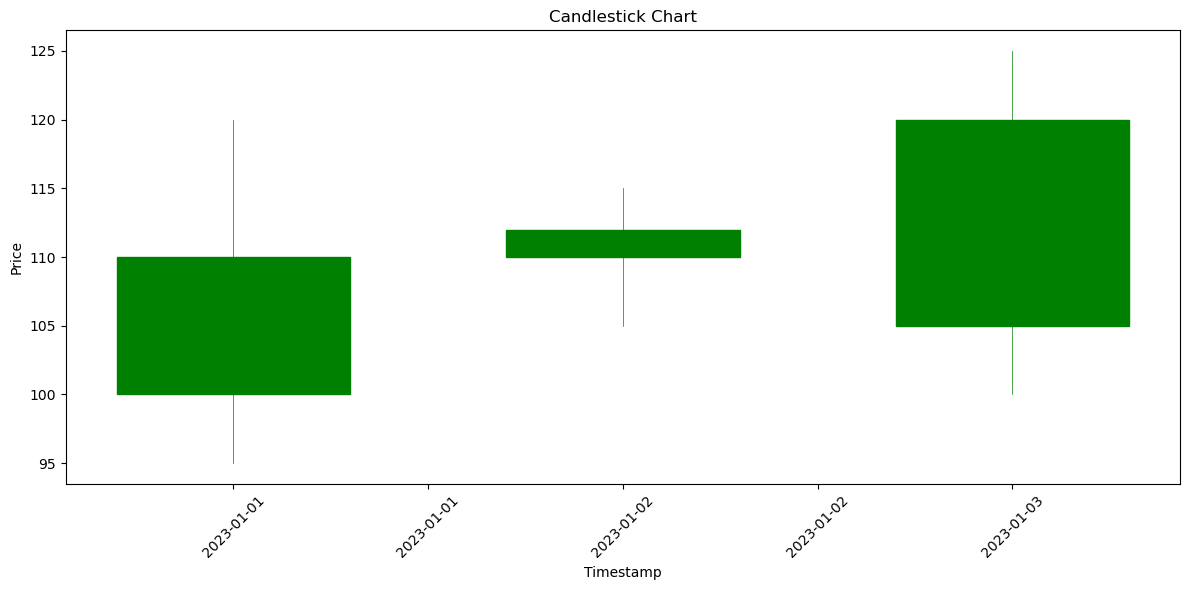

In [178]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Create a sample DataFrame with timestamp, open, high, low, close
# You can replace this with your actual DataFrame
data = {
    'timestamp': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'open': [100, 110, 105],
    'high': [120, 115, 125],
    'low': [95, 105, 100],
    'close': [110, 112, 120]
}
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert to datetime format

ohlc = df[['timestamp', 'open', 'high', 'low', 'close']].copy()
ohlc['timestamp'] = mdates.date2num(ohlc['timestamp'])  # Convert to numerical format

plt.figure(figsize=(12, 6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='g', colordown='r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Candlestick Chart')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ****Feature Engineering

In [179]:
df['Moving_Avg_Close'] = df['close'].rolling(window=7).mean()

# ****Modelling

In [180]:
df.shape

(3, 6)

# Data Preparation & Normalization

In [181]:
# Prepare the data for LSTM
X_train = df['close'].values.reshape(-1, 1)
y_train = df['close'].shift(-1).dropna().values

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the test data
test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

# Prepare the data for prediction
X_test = test_data['close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)


# Reshaping Data

In [182]:
# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

# Building a LSTM Model

In [183]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Set the number of epochs and batch size
epochs = 30
batch_size = 15

# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]
        model.train_on_batch(X_batch, y_batch)

# Prepare the data for prediction
X_test = test_data['close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

100%|██████████| 30/30 [00:02<00:00, 11.26it/s]


# Predictions using LSTM

In [184]:
lstm_predictions = model.predict(X_test_lstm).flatten()

1/1 [==============================] - 0s 341ms/step


# Inverse transform of the predictions

In [185]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


# Visualization of LSTM predictions

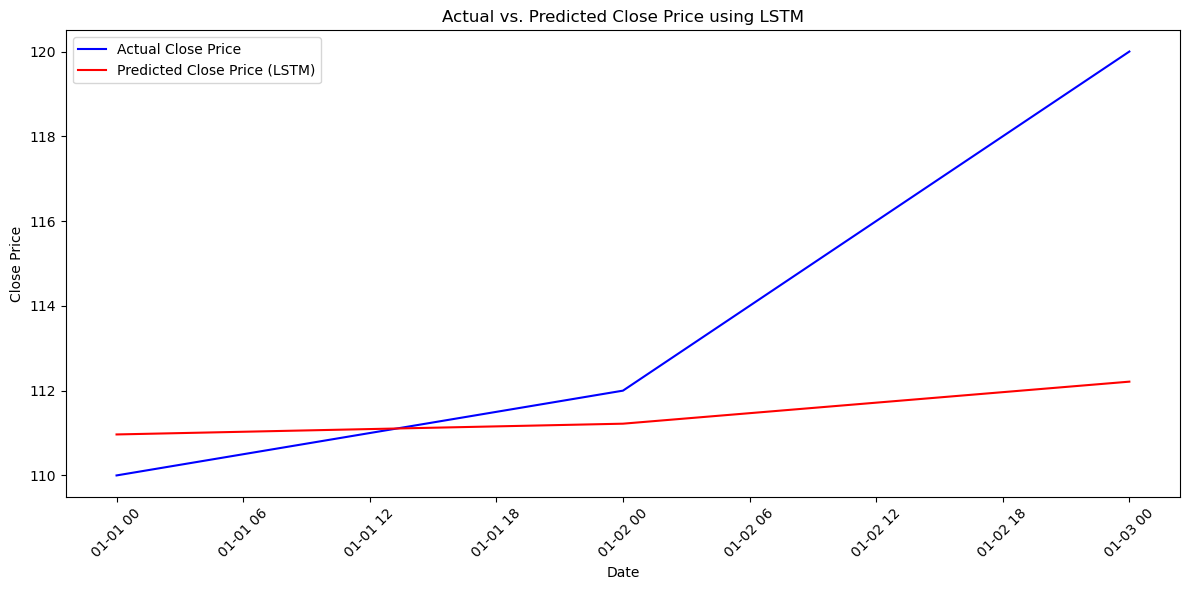

In [186]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['timestamp'], test_data['close'], label='Actual Close Price', color='b')
plt.plot(test_data['timestamp'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Mean Absolute Error

In [187]:
lstm_mae = mean_absolute_error(test_data['close'], lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 3.177912394205729


In [188]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


date_index = test_data.index[-len(lstm_predictions):]  
predictions_df = pd.DataFrame({'timestamp': date_index, 'Predicted_Close': lstm_predictions.flatten()})


predictions_df.to_csv('predictions.csv', index=False)
